# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification

* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.


To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

https://www.tensorflow.org/datasets/catalog/fashion_mnist

In [72]:
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test dataset

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [73]:
# Show the first training example

print(f"Training sample: \n{train_data[0]}\n")
print(f"Training label: \n{train_labels[0]}\n")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [74]:
# Check the shape of single example

train_data[0].shape, train_labels[0].shape


((28, 28), ())

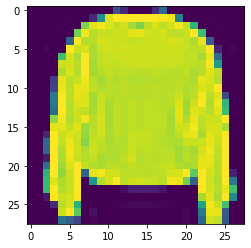

In [11]:
# Plot a single sampe

import matplotlib.pyplot as plt

plt.imshow(train_data[7])

In [10]:
# Check out samples labels

train_labels[7]

2

In [12]:
# Create a small list so we can index onto our training labels so they're human-readable 

class_names = ["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [14]:
len(class_names)

10

Text(0.5, 1.0, 'Trouser')

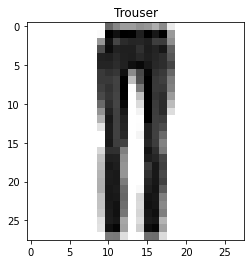

In [34]:
# Plot an example image and its label
import numpy as np
index_of_choice = np.random.randint(5000)
plt.imshow(train_data[index_of_choice],cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

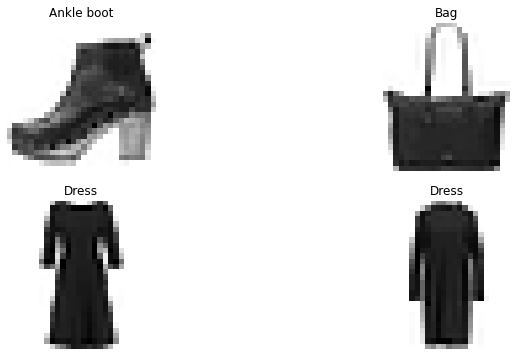

In [36]:
# Plot multiple random imgaes of fahsion mnist

import random

plt.figure(figsize=(12,6))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index],cmap= plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a multiclass classification model

For our multiclass classificaiton model, we can use a similar architecture to our bianry classifiers, however, there are some different things

* Input_shape= 28 x28 (the shape of one image)
* Output_shape = 10 (one per class of clothing)=
* Loss function = tf.keras.losses.CategoricalCrossentropy()
    * If the labels are one-hot encoded, Use  tf.keras.losses.CategoricalCrossentropy()
    * If the labels are integers form, Use  tf.keras.losses.SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [71]:
train_data[0].shape

(28, 28)

In [56]:
# Our data needs to be flattened (from 28 * 28 to (None,784))
flatten_model =tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [57]:
28*28

784

In [58]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

# If you want to use integers value as loss fuction 
# Please use
# SparseCategoricalCrossentropy()



In [59]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # Hey we are gonna pass 28x28 data so it will be (None,784)
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(10,activation = tf.keras.activations.softmax)
])
model_1.compile(loss =tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

non_norm_history = model_1.fit(train_data,
                              train_labels,
                              epochs = 10,
                              validation_data=(test_data,test_labels)) 
# fot this time we don't have the validation_data instead use test_data

Epoch 1/10
1875/1875 [==============================] - 2s 938us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 99.9192 - val_accuracy: 0.7298
Epoch 2/10
1875/1875 [==============================] - 2s 923us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 108.3327 - val_accuracy: 0.7341
Epoch 3/10
1875/1875 [==============================] - 2s 882us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 102.6736 - val_accuracy: 0.7373
Epoch 4/10
1875/1875 [==============================] - 2s 909us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 132.9137 - val_accuracy: 0.7042
Epoch 5/10
1875/1875 [==============================] - 2s 875us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 150.7092 - val_accuracy: 0.7028
Epoch 6/10
1875/1875 [==============================] - 2s 890us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 126.4341 - val_accuracy: 0.7159
Epoch 7/10
1875/1875 [==============================] - 2s 896us/step - loss: 0.5488 - accuracy: 0.8063 - val_los

In [81]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # Hey we are gonna pass 28x28 data so it will be (None,784)
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(10,activation = tf.keras.activations.softmax)
])
model_1.compile(loss =tf.keras.losses.CategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

non_norm_history = model_1.fit(train_data,
                              tf.one_hot(train_labels,depth=10),
                              epochs = 10,
                              validation_data=(test_data,tf.one_hot(test_labels,depth=10)))
# fot this time we don't have the validation_data instead use test_data

Epoch 1/10
1875/1875 [==============================] - 2s 940us/step - loss: 2.1637 - accuracy: 0.1623 - val_loss: 1.7857 - val_accuracy: 0.2104
Epoch 2/10
1875/1875 [==============================] - 2s 861us/step - loss: 1.7077 - accuracy: 0.2546 - val_loss: 1.7519 - val_accuracy: 0.2826
Epoch 3/10
1875/1875 [==============================] - 2s 880us/step - loss: 1.6308 - accuracy: 0.2851 - val_loss: 1.6097 - val_accuracy: 0.2756
Epoch 4/10
1875/1875 [==============================] - 2s 855us/step - loss: 1.6096 - accuracy: 0.2891 - val_loss: 1.6042 - val_accuracy: 0.2933
Epoch 5/10
1875/1875 [==============================] - 2s 911us/step - loss: 1.5956 - accuracy: 0.3022 - val_loss: 1.5969 - val_accuracy: 0.3255
Epoch 6/10
1875/1875 [==============================] - 2s 880us/step - loss: 1.5877 - accuracy: 0.3145 - val_loss: 1.6069 - val_accuracy: 0.3217
Epoch 7/10
1875/1875 [==============================] - 2s 857us/step - loss: 1.5753 - accuracy: 0.3232 - val_loss: 1.5691 -

In [61]:
# Check the model summary

model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 4)                 3140      
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Check the min and max values of the training data

train_data.min(),train_data.max()

(0, 255)

## Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensor between 0&1

In [76]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum

train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [77]:
# Check the min max value of the data

train_data_norm.min(),train_data_norm.max(),test_data_norm.min(),test_data_norm.max()

(0.0, 1.0, 0.0, 1.0)

In [78]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4,activation ="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation = "softmax")
])


model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

norm_history = model_2.fit(train_data_norm,
                          train_labels,
                          epochs = 10,
                          validation_data = (test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 860us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 2s 883us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 2s 840us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 2s 856us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 2s 823us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 2s 825us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 2s 876us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 -

**Note:** Neural networks tend to prefer in numerical form as wellas scale/normalized(numbers between 0&1)

In [79]:
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 4)                 3140      
                                                                 
 dense_31 (Dense)            (None, 4)                 20        
                                                                 
 dense_32 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:title={'center':'Normalized data'}>

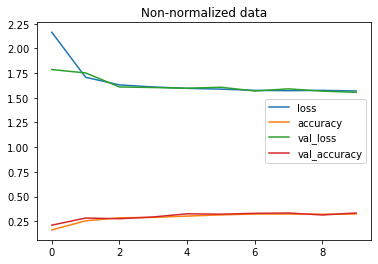

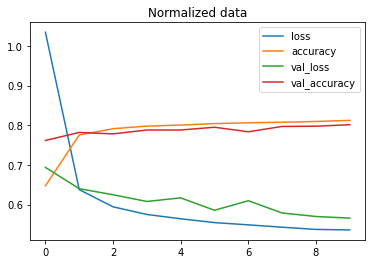

In [82]:
import pandas as pd

# Plot non-normalized data loss curves

pd.DataFrame(non_norm_history.history).plot(title = "Non-normalized data")

# Plot normalized data loss curves

pd.DataFrame(norm_history.history).plot(title = "Normalized data")

**Note:** The same model even slightly different data can produce dramatically different results . So when comparing models it's important to make sure comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture)

# Finding the ideal learning rate

In [83]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "softmax")
])


model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])
# Create the learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))


find_lr_history = model_3.fit(train_data_norm,
                             train_labels,
                             epochs = 40,
                             validation_data = (test_data_norm,test_labels),
                             callbacks = lr_scheduler)

Epoch 1/40
1875/1875 [==============================] - 2s 955us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 2s 870us/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 2s 881us/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 2s 911us/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 2s 878us/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 2s 866us/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [========================

Text(0.5, 1.0, 'Finding the ideal learning rate')

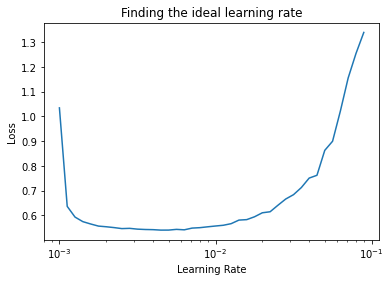

In [85]:
# Plot the learning rate decay curve

import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
# Let's say is ideal lr
10**-3 

In [86]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "softmax")
])


model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(lr = 0.001),
               metrics = ["accuracy"])


history_4 = model_4.fit(train_data_norm,
                             train_labels,
                             epochs = 20,
                             validation_data = (test_data_norm,test_labels))

C:\Users\Younghun\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 2s 936us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 2s 866us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 2s 872us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 2s 906us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 2s 904us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 2s 892us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 2s 930us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 -

# Evaluating our multi-class classificatino model

To evaluate our multi-class classification model we could:
    
* Evaluate its performance using other classification methods
(such as a confusion matrix)
* Asses some of its predictions (Through visulaizations)
* Improve its results (by training it for longer or changing the architecture)
* SAve and export it for use in an application)

In [88]:
# Using top 2

import itertools
from sklearn.metrics import confusion_matrix

figsize = (10,10)

def make_confusion_matrix(y_true,y_pred,classes= None,figsize = (10,10),text_size = 20):
    
    
    # Create the confusion matrix

    cm = confusion_matrix(y_true,y_preds)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
    n_classes = cm.shape[0]


    # Prettify it

    fig, ax = plt.subplots(figsize=figsize)

    # Create a matrix plot

    cax = ax.matshow(cm,cmap=plt.cm.Blues) # matplotlib matshow
    fig.colorbar(cax)

    # Set Labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes

    ax.set(title = "Confusion matrix",
          xlabel = "Predicted Label",
          ylabel = "True Label",
          xticks = np.arange(n_classes),
          yticks = np.arange(n_classes),
          xticklabels = labels,
          yticklabels = labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set the threshhold for different colors

    threshhold = ((cm.max()+ cm.min())/2)

    # Plot some tesxt on each cell

    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                horizontalalignment = "center",
                color = "white" if cm[i,j]>threshhold else "black",
                size = text_size)

In [89]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [91]:
# make some predictinos

y_probs = model_4.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 predictions

y_probs[:5]


array([[8.5629837e-11, 3.5361774e-13, 2.6633687e-05, 4.6356124e-08,
        5.0949824e-05, 9.6118763e-02, 8.1778062e-08, 9.1869138e-02,
        4.0605152e-03, 8.0787385e-01],
       [3.4278617e-06, 1.2899313e-16, 9.5989138e-01, 2.0516273e-07,
        1.5329214e-02, 2.4532568e-13, 2.4142874e-02, 1.1383534e-28,
        6.3272309e-04, 4.4789552e-08],
       [6.1063001e-05, 9.9657673e-01, 4.3866976e-08, 3.3405819e-03,
        1.3249461e-05, 1.4383379e-21, 8.2790375e-06, 7.3236901e-18,
        5.4811395e-08, 4.9225140e-14],
       [7.5031152e-05, 9.9053699e-01, 4.2528373e-07, 9.2231436e-03,
        1.3623080e-04, 1.8276163e-18, 2.6808120e-05, 4.8123828e-14,
        1.4521453e-06, 2.2211379e-11],
       [7.2190031e-02, 1.5495845e-06, 2.5566879e-01, 1.0363137e-02,
        4.3541368e-02, 1.1069368e-13, 6.1693031e-01, 6.7543653e-23,
        1.3049177e-03, 1.2140362e-09]], dtype=float32)

**Note:** Remember to make predictions on the same kind of data model was trained on (e.g. if model was trained on normalized data, Have to make predictions on normalized data)

In [93]:
y_probs[0],tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.5629837e-11, 3.5361774e-13, 2.6633687e-05, 4.6356124e-08,
        5.0949824e-05, 9.6118763e-02, 8.1778062e-08, 9.1869138e-02,
        4.0605152e-03, 8.0787385e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [94]:
# Convert all of the probabilites into integers 

y_preds = y_probs.argmax(axis=1)

# View the first 10 predictino labels

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [95]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [98]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true= test_labels,
                y_pred = y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]], dtype=int64)

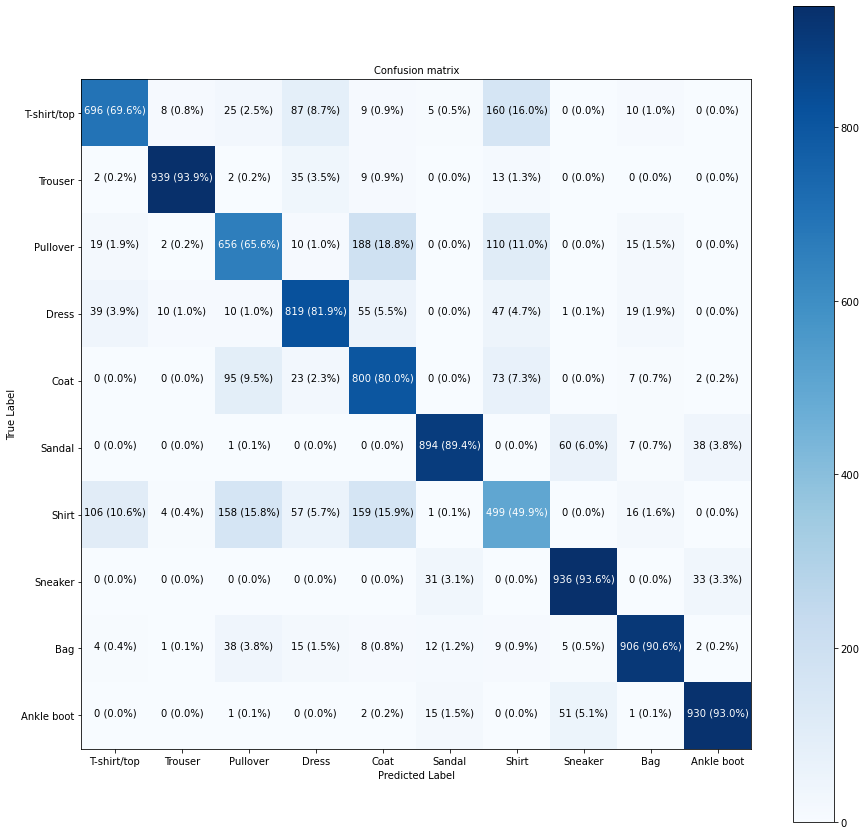

In [100]:
# Make a prettier confusion matrix

make_confusion_matrix(y_true = test_labels,
                     y_pred = y_preds,
                     classes = class_names,
                     figsize = (15,15),
                     text_size = 10)

**Note:** Often when working with images and other forms of visual data, it's a good idea to visulaize as much as possible to develop a further understanding of the data and the inputs and outputs of models


How about creating a fun little function for:
* Plot a random image
* Make a prediction on said imgae
* Label the plot with the truth label  & the predicted label

In [103]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels it with a prediction and truth label.
    """
    
    # set up random integer
    
    i = random.randint(0, len(images))
    
    # Create predictions and targets
    
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1,28,28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    # Change the color of the titles depending on if the prediction is right or wrong
    
    if pred_label == true_label:
        color = "green"
        
    else: 
        color = "red"
        
    # Add xlabel information (prediction / true label)
    
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color = color) # set the color to green or red based on if predictino right or worng

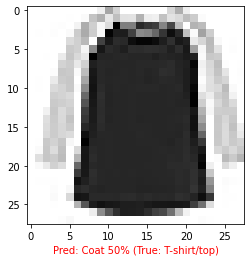

In [119]:
# Check out our random image as well as its prediction

plot_random_image(model = model_4,
                 images= test_data_norm, # Always prediction on the same kinds of data the model used!!!!!
                 true_labels = test_labels,
                 classes = class_names)

## What patterns is our model learning?

In [120]:
# Find the layers of our most recent model

model_4.layers

In [122]:
# Extract a particular layer

model_4.layers[1]

In [123]:
# Get the patterns of a layer in our network

weights, biases = model_4.layers[1].get_weights()

# Shapes

weights, weights.shape

(array([[ 0.71502614, -0.06077091, -0.9976306 , -1.048431  ],
        [ 0.27732122, -0.47155404, -0.5291647 ,  0.02329241],
        [ 0.77524287,  0.54027605, -1.1288567 , -0.74261564],
        ...,
        [-0.39453438,  0.4762868 , -0.22641568,  0.2550596 ],
        [-0.4051578 ,  0.61810076,  0.23928422, -0.50387627],
        [ 0.23884557,  0.116069  , -0.1213137 ,  0.04352447]],
       dtype=float32),
 (784, 4))

In [124]:
28*28

784

In [125]:
model_4.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_39 (Dense)            (None, 4)                 3140      
                                                                 
 dense_40 (Dense)            (None, 4)                 20        
                                                                 
 dense_41 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


# Now let's check out the bias vector

In [127]:
# Bias and biases shaeps
biases, biases.shape

(array([ 2.4485828e-02, -6.1469642e-04, -2.7230155e-01,  8.1124896e-01],
       dtype=float32),
 (4,))

Every neruon has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initialized as zeros (at least in the case of a TensorFlow dense layers).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence  the next layer.

In [128]:
model_4.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_39 (Dense)            (None, 4)                 3140      
                                                                 
 dense_40 (Dense)            (None, 4)                 20        
                                                                 
 dense_41 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


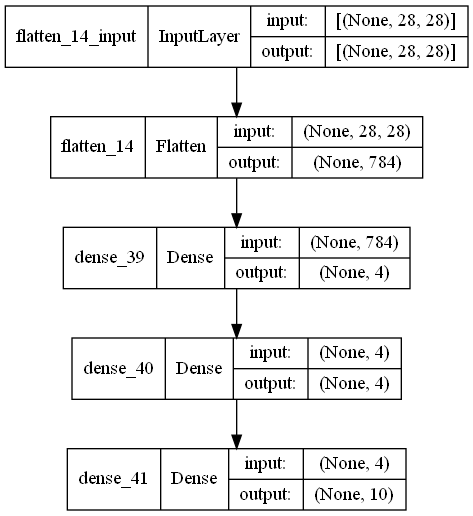

In [129]:
# Let's check out another way of viewing our deep learning models

from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer

plot_model(model_4, show_shapes = True)